In [12]:
import sys
sys.path.append('../')
import scipy.io
from utils.mat_to_tfrecord_analysis import formatSessionData
from pathlib import Path
import numpy as np
import os

session = 't17.2024.04.24'
blocks = [2,3,6,7,8,9,10]
trialsToRemove = []
dataDir = str(Path('../Data', 't17', session, 'brainToText'))
data = formatSessionData(
                      blocks,
                      trialsToRemove,
                      dataDir,
                      start_offset=-150,
                      end_offset=250,
                      channels_to_exclude=[],
                      channels_to_zero=[],
                      includeThreshCrossings=True,
                      includeSpikePower=True,
                      spikePowerMax=10000,
                      globalStd=False,
                      zscoreData=True,
                      bin_compression_factor=32)

inputFeatures = data['inputFeatures']
cues = data['transcriptions']
cues = np.array([cue.strip() for cue in cues])
all_cues, counts = np.unique(cues,return_counts=True)
print('Movmement Counts: ', counts)
print(inputFeatures[0].shape)
arrays = {'6v and 6d Motor Channels' : np.concatenate((np.arange(0,128), np.arange(256,384))), '6d hand': np.arange(256,384)}

RedisMat file for block 2: ../Data/t17/t17.2024.04.24/brainToText/RedisMat/20240424_135122_(2).mat
RedisMat file for block 3: ../Data/t17/t17.2024.04.24/brainToText/RedisMat/20240424_140526_(3).mat
RedisMat file for block 6: ../Data/t17/t17.2024.04.24/brainToText/RedisMat/20240424_161851_(6).mat
RedisMat file for block 7: ../Data/t17/t17.2024.04.24/brainToText/RedisMat/20240424_163106_(7).mat
RedisMat file for block 8: ../Data/t17/t17.2024.04.24/brainToText/RedisMat/20240424_164356_(8).mat
RedisMat file for block 9: ../Data/t17/t17.2024.04.24/brainToText/RedisMat/20240424_171508_(9).mat
RedisMat file for block 10: ../Data/t17/t17.2024.04.24/brainToText/RedisMat/20240424_172909_(10).mat
Movmement Counts:  [14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14]
(20, 768)


In [13]:
mapping=  {'LEFT PINKY - Extend Upwards':'Up',
           'LEFT PINKY - Straight Downwards':'Down',
           'LEFT PINKY - In to Palm':'In',
           'LEFT RING - Extend Upwards':'Up',
           'LEFT RING - Straight Downwards':'Down',
           'LEFT RING - In to Palm':'In',
           'LEFT MIDDLE - Extend Upwards':'Up',
           'LEFT MIDDLE - Straight Downwards':'Down',
           'LEFT MIDDLE - In to Palm':'In',
           'LEFT INDEX - Extend Upwards':'Up',
           'LEFT INDEX - Straight Downwards':'Down',
           'LEFT INDEX - In to Palm':'In',
           'LEFT THUMB - Extend Upwards':'Up',
           'LEFT THUMB - Straight Downwards':'Down',
           'LEFT THUMB - In to Palm':'In',
           'RIGHT PINKY - Extend Upwards':'Up',
           'RIGHT PINKY - Straight Downwards':'Down',
           'RIGHT PINKY - In to Palm':'In',
           'RIGHT RING - Extend Upwards':'Up',
           'RIGHT RING - Straight Downwards':'Down',
           'RIGHT RING - In to Palm':'In',
           'RIGHT MIDDLE - Extend Upwards':'Up',
           'RIGHT MIDDLE - Straight Downwards':'Down',
           'RIGHT MIDDLE - In to Palm':'In',
           'RIGHT INDEX - Extend Upwards':'Up',
           'RIGHT INDEX - Straight Downwards':'Down',
           'RIGHT INDEX - In to Palm':'In',
           'RIGHT THUMB - Extend Upwards':'Up',
           'RIGHT THUMB - Straight Downwards':'Down',
           'RIGHT THUMB - In to Palm':'In',
           'DO NOTHING': 'None'}

0.8133640552995391
[0.78801843 0.83640553]
dict_values(['Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'None'])


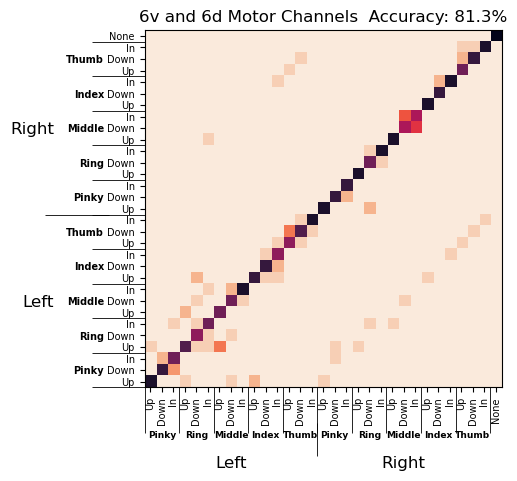

0.8018433179723502
[0.7764977  0.82488479]
dict_values(['Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'None'])


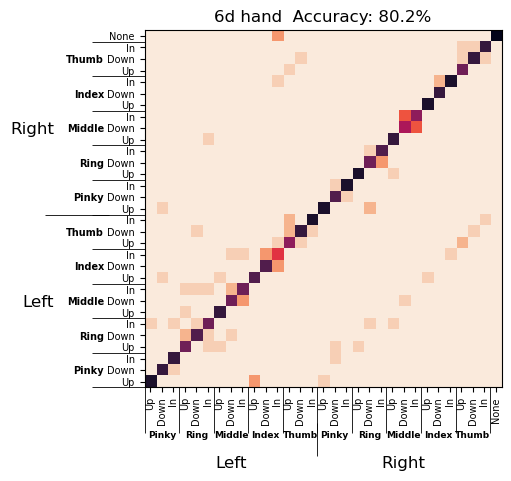

In [14]:
from utils.analysisT17 import gnb_loo, bootCI
import seaborn as sns
def plotConfusionMatrix(unroll_y, y_pred, tickLabels, orderIdx, title, figName):
    codeList = np.unique(unroll_y)
    nCodes = len(codeList)
    cMat = np.zeros([nCodes, nCodes])

    for x in range(nCodes):
        for y in range(nCodes):
            thisSum = np.sum(np.logical_and(unroll_y==codeList[orderIdx[x]], y_pred==codeList[orderIdx[y]]))
            cMat[x,y] = thisSum

    for x in range(nCodes):
        cMat[x,:] = cMat[x,:] / np.sum(cMat[x,:])    
        
    import matplotlib.pyplot as plt
    from utils.analysisT17 import plotPreamble
    plotPreamble()
    
    reorderLabels = tickLabels
    print(reorderLabels)
    fig, ax = plt.subplots(layout='constrained', figsize=(5, 5))
    
    cmatrix = ax.imshow(cMat.T,clim=[0,1],cmap=sns.color_palette("rocket_r", as_cmap=True))
    
    ax.set_xticks(ticks=np.arange(0,len(tickLabels)), labels=reorderLabels, rotation=90, fontsize=7)
    ax.set_yticks(ticks=np.arange(0,len(tickLabels)), labels=reorderLabels, fontsize=7)
    sec = ax.secondary_xaxis(location=-0.08)
    sec.set_xticks([1, 4, 7,10,13,16,19,22,25,28], labels=['\nPinky', '\nRing', '\nMiddle', '\nIndex', '\nThumb','\nPinky', '\nRing', '\nMiddle', '\nIndex', '\nThumb'], fontsize=6.5)
    sec.tick_params('x', length=0)
    for lab in sec.get_xticklabels():
        lab.set_fontweight('bold')
    sec.spines['bottom'].set_linewidth(0)
    
    sec2 = ax.secondary_xaxis(location=0)
    sec2.set_xticks([-0.5, 2.5, 5.5, 8.5, 11.5, 14.5,17.5,20.5,23.5,26.5, 29.5], labels=[])
    sec2.tick_params('x', length=33, width=0.6)
    sec2.spines['bottom'].set_linewidth(0)

    sec3 = ax.secondary_xaxis(location=-0.13)
    sec3.set_xticks([7,22], labels=['\nLeft', '\nRight'], fontsize=12)
    sec3.tick_params('x', length=0)
    sec3.spines['bottom'].set_linewidth(0)

    sec4 = ax.secondary_xaxis(location=-0.1)
    sec4.set_xticks([14.5], labels=[])
    sec4.tick_params('x', length=24, width=0.6)
    sec4.spines['bottom'].set_linewidth(0)

    sec5 = ax.secondary_yaxis(location=-0.1)
    sec5.set_yticks([1, 4, 7,10,13,16,19,22,25,28], labels=['Pinky', 'Ring', 'Middle', 'Index', 'Thumb','Pinky', 'Ring', 'Middle', 'Index', 'Thumb'], fontsize=7)
    sec5.tick_params('y', length=0)
    for lab in sec5.get_yticklabels():
        lab.set_fontweight('bold')
    
    sec5.spines['left'].set_linewidth(0)
    
    sec6 = ax.secondary_yaxis(location=0)
    sec6.set_yticks([-0.5, 2.5, 5.5, 8.5, 11.5, 14.5,17.5,20.5,23.5,26.5, 29.5], labels=[])
    sec6.tick_params('y', length=38, width=0.6)
    sec6.spines['left'].set_linewidth(0)

    sec7 = ax.secondary_yaxis(location=-0.24)
    sec7.set_yticks([7,22], labels=['Left', 'Right'], fontsize=12)
    sec7.tick_params('y', length=0)
    sec7.spines['left'].set_linewidth(0)

    sec8 = ax.secondary_yaxis(location=-0.1)
    sec8.set_yticks([14.5], labels=[])
    sec8.tick_params('y', length=46, width=0.6)
    sec8.spines['left'].set_linewidth(0)
   # ax.set_xlim(-0.6, 8.6)
    plt.gca().invert_yaxis()
    #cbar = fig.colorbar(cmatrix)
    #cbar.ax.tick_params(labelsize=12)
    plt.title(title,fontsize=12)
    plt.savefig(figName, bbox_inches="tight")
    plt.show()

gathered_trials = []
for i, k in enumerate(mapping):
    indices = np.array(np.argwhere(cues == k)).flatten()
    all_trials_this_phone = np.zeros((indices.shape[0],  inputFeatures[0].shape[0], inputFeatures[0].shape[-1]))    
    for j, trial in enumerate(indices):
        all_trials_this_phone[j,:inputFeatures[trial].shape[0] ,:] = np.nan_to_num(inputFeatures[trial][:21, :])
    gathered_trials.append(all_trials_this_phone)
range_to_apply_gnb = [2,11]
save_dir = session + '-T17GNBConfusions/'
os.makedirs(save_dir, exist_ok=True)
for array, channels_to_include in arrays.items():
    y_pred, unroll_y = gnb_loo(gathered_trials, range_to_apply_gnb, channels_to_include.astype(np.int32))
    print(np.mean(y_pred==unroll_y))
    print(bootCI(y_pred, unroll_y))

    figname =  save_dir + array + 'Blocks' + '-'.join(str(b) for b in blocks) + 'cbar.eps'
    plotConfusionMatrix(unroll_y, y_pred, mapping.values(), np.arange(len(mapping)), 
                        array + '  Accuracy: '+str(np.round(1000*np.mean(y_pred==unroll_y))/10)+'%', 
                        figname)

In [15]:
mapping=  {'LEFT PINKY - Extend Upwards':'Up',
           'LEFT PINKY - Straight Downwards':'Down',
           'LEFT PINKY - In to Palm':'In',
           'LEFT RING - Extend Upwards':'Up',
           'LEFT RING - Straight Downwards':'Down',
           'LEFT RING - In to Palm':'In',
           'LEFT MIDDLE - Extend Upwards':'Up',
           'LEFT MIDDLE - Straight Downwards':'Down',
           'LEFT MIDDLE - In to Palm':'In',
           'LEFT INDEX - Extend Upwards':'Up',
           'LEFT INDEX - Straight Downwards':'Down',
           'LEFT INDEX - In to Palm':'In',
           'LEFT THUMB - Extend Upwards':'Up',
           'LEFT THUMB - Straight Downwards':'Down',
           'LEFT THUMB - In to Palm':'In',
           'DO NOTHING': 'None'}

0.84375
[0.8125 0.875 ]
dict_values(['Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'None'])


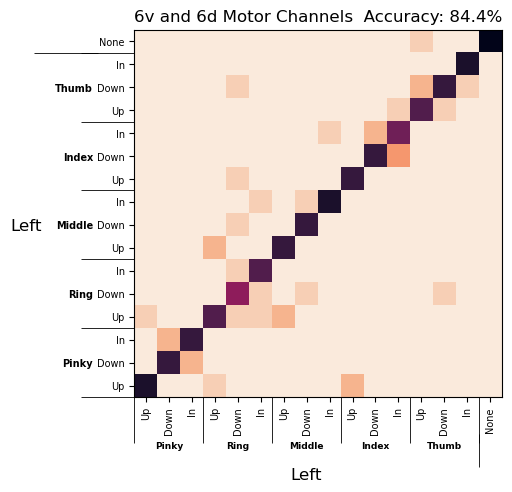

0.8035714285714286
[0.76785714 0.83928571]
dict_values(['Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'None'])


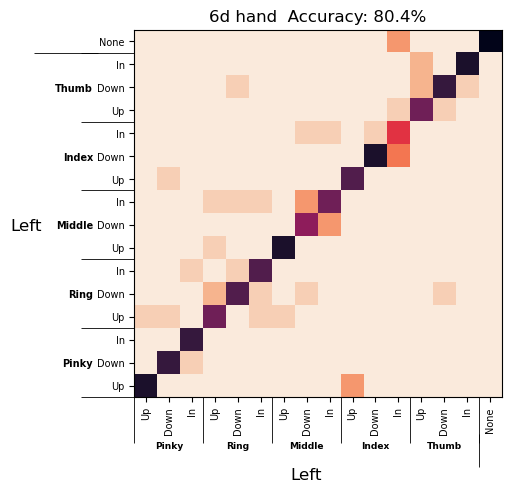

In [16]:
from utils.analysisT17 import gnb_loo, bootCI
import seaborn as sns
def plotConfusionMatrix(unroll_y, y_pred, tickLabels, orderIdx, title, figName):
    codeList = np.unique(unroll_y)
    nCodes = len(codeList)
    cMat = np.zeros([nCodes, nCodes])

    for x in range(nCodes):
        for y in range(nCodes):
            thisSum = np.sum(np.logical_and(unroll_y==codeList[orderIdx[x]], y_pred==codeList[orderIdx[y]]))
            cMat[x,y] = thisSum

    for x in range(nCodes):
        cMat[x,:] = cMat[x,:] / np.sum(cMat[x,:])    
        
    import matplotlib.pyplot as plt
    from utils.analysisT17 import plotPreamble
    plotPreamble()
    
    reorderLabels = tickLabels
    print(reorderLabels)
    fig, ax = plt.subplots(layout='constrained', figsize=(5, 5))
    
    cmatrix = ax.imshow(cMat.T,clim=[0,1],cmap=sns.color_palette("rocket_r", as_cmap=True))
    
    ax.set_xticks(ticks=np.arange(0,len(tickLabels)), labels=reorderLabels, rotation=90, fontsize=7)
    ax.set_yticks(ticks=np.arange(0,len(tickLabels)), labels=reorderLabels, fontsize=7)
    sec = ax.secondary_xaxis(location=-0.08)
    sec.set_xticks([1, 4, 7,10,13,16,19,22,25,28], labels=['\nPinky', '\nRing', '\nMiddle', '\nIndex', '\nThumb','\nPinky', '\nRing', '\nMiddle', '\nIndex', '\nThumb'], fontsize=6.5)
    sec.tick_params('x', length=0)
    for lab in sec.get_xticklabels():
        lab.set_fontweight('bold')
    sec.spines['bottom'].set_linewidth(0)
    
    sec2 = ax.secondary_xaxis(location=0)
    sec2.set_xticks([-0.5, 2.5, 5.5, 8.5, 11.5, 14.5,17.5,20.5,23.5,26.5, 29.5], labels=[])
    sec2.tick_params('x', length=33, width=0.6)
    sec2.spines['bottom'].set_linewidth(0)

    sec3 = ax.secondary_xaxis(location=-0.13)
    sec3.set_xticks([7,22], labels=['\nLeft', '\nRight'], fontsize=12)
    sec3.tick_params('x', length=0)
    sec3.spines['bottom'].set_linewidth(0)

    sec4 = ax.secondary_xaxis(location=-0.1)
    sec4.set_xticks([14.5], labels=[])
    sec4.tick_params('x', length=24, width=0.6)
    sec4.spines['bottom'].set_linewidth(0)

    sec5 = ax.secondary_yaxis(location=-0.1)
    sec5.set_yticks([1, 4, 7,10,13,16,19,22,25,28], labels=['Pinky', 'Ring', 'Middle', 'Index', 'Thumb','Pinky', 'Ring', 'Middle', 'Index', 'Thumb'], fontsize=7)
    sec5.tick_params('y', length=0)
    for lab in sec5.get_yticklabels():
        lab.set_fontweight('bold')
    
    sec5.spines['left'].set_linewidth(0)
    
    sec6 = ax.secondary_yaxis(location=0)
    sec6.set_yticks([-0.5, 2.5, 5.5, 8.5, 11.5, 14.5,17.5,20.5,23.5,26.5, 29.5], labels=[])
    sec6.tick_params('y', length=38, width=0.6)
    sec6.spines['left'].set_linewidth(0)

    sec7 = ax.secondary_yaxis(location=-0.24)
    sec7.set_yticks([7,22], labels=['Left', 'Right'], fontsize=12)
    sec7.tick_params('y', length=0)
    sec7.spines['left'].set_linewidth(0)

    sec8 = ax.secondary_yaxis(location=-0.1)
    sec8.set_yticks([14.5], labels=[])
    sec8.tick_params('y', length=46, width=0.6)
    sec8.spines['left'].set_linewidth(0)
   # ax.set_xlim(-0.6, 8.6)
    plt.gca().invert_yaxis()
    #cbar = fig.colorbar(cmatrix)
    #cbar.ax.tick_params(labelsize=12)
    plt.title(title,fontsize=12)
    plt.savefig(figName, bbox_inches="tight")
    plt.show()

gathered_trials = []
for i, k in enumerate(mapping):
    indices = np.array(np.argwhere(cues == k)).flatten()
    all_trials_this_phone = np.zeros((indices.shape[0],  inputFeatures[0].shape[0], inputFeatures[0].shape[-1]))    
    for j, trial in enumerate(indices):
        all_trials_this_phone[j,:inputFeatures[trial].shape[0] ,:] = np.nan_to_num(inputFeatures[trial][:21, :])
    gathered_trials.append(all_trials_this_phone)
range_to_apply_gnb = [2,11]
save_dir = session + '-T17GNBConfusionsLeft/'
os.makedirs(save_dir, exist_ok=True)
for array, channels_to_include in arrays.items():
    y_pred, unroll_y = gnb_loo(gathered_trials, range_to_apply_gnb, channels_to_include.astype(np.int32))
    left_preds = y_pred==unroll_y
    print(np.mean(y_pred==unroll_y))
    print(bootCI(y_pred, unroll_y))

    figname =  save_dir + array + 'Blocks' + '-'.join(str(b) for b in blocks) + 'cbarLeft.eps'
    plotConfusionMatrix(unroll_y, y_pred, mapping.values(), np.arange(len(mapping)), 
                        array + '  Accuracy: '+str(np.round(1000*np.mean(y_pred==unroll_y))/10)+'%', 
                        figname)

In [17]:
mapping = {'RIGHT PINKY - Extend Upwards':'Up',
           'RIGHT PINKY - Straight Downwards':'Down',
           'RIGHT PINKY - In to Palm':'In',
           'RIGHT RING - Extend Upwards':'Up',
           'RIGHT RING - Straight Downwards':'Down',
           'RIGHT RING - In to Palm':'In',
           'RIGHT MIDDLE - Extend Upwards':'Up',
           'RIGHT MIDDLE - Straight Downwards':'Down',
           'RIGHT MIDDLE - In to Palm':'In',
           'RIGHT INDEX - Extend Upwards':'Up',
           'RIGHT INDEX - Straight Downwards':'Down',
           'RIGHT INDEX - In to Palm':'In',
           'RIGHT THUMB - Extend Upwards':'Up',
           'RIGHT THUMB - Straight Downwards':'Down',
           'RIGHT THUMB - In to Palm':'In',
           'DO NOTHING': 'None'}

0.8616071428571429
[0.83035714 0.89285714]
dict_values(['Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'None'])


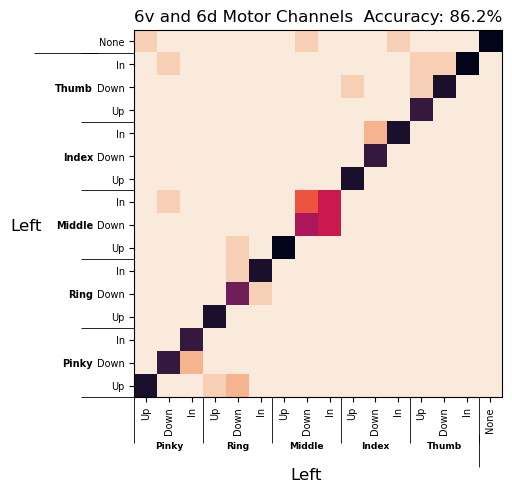

0.8526785714285714
[0.82142857 0.88392857]
dict_values(['Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'Up', 'Down', 'In', 'None'])


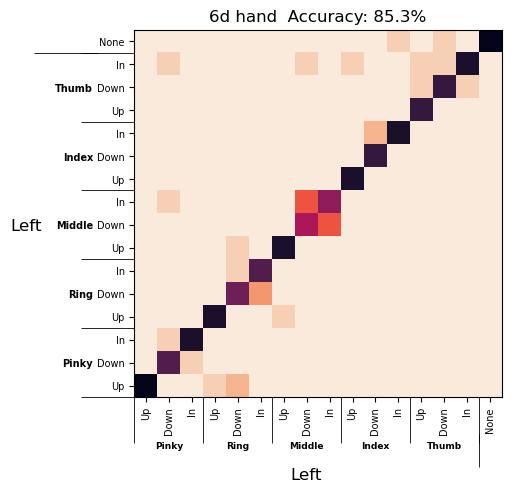

In [18]:
from utils.analysisT17 import gnb_loo, bootCI
import seaborn as sns
def plotConfusionMatrix(unroll_y, y_pred, tickLabels, orderIdx, title, figName):
    codeList = np.unique(unroll_y)
    nCodes = len(codeList)
    cMat = np.zeros([nCodes, nCodes])

    for x in range(nCodes):
        for y in range(nCodes):
            thisSum = np.sum(np.logical_and(unroll_y==codeList[orderIdx[x]], y_pred==codeList[orderIdx[y]]))
            cMat[x,y] = thisSum

    for x in range(nCodes):
        cMat[x,:] = cMat[x,:] / np.sum(cMat[x,:])    
        
    import matplotlib.pyplot as plt
    from utils.analysisT17 import plotPreamble
    plotPreamble()
    
    reorderLabels = tickLabels
    print(reorderLabels)
    fig, ax = plt.subplots(layout='constrained', figsize=(5, 5))
    
    cmatrix = ax.imshow(cMat.T,clim=[0,1],cmap=sns.color_palette("rocket_r", as_cmap=True))
    
    ax.set_xticks(ticks=np.arange(0,len(tickLabels)), labels=reorderLabels, rotation=90, fontsize=7)
    ax.set_yticks(ticks=np.arange(0,len(tickLabels)), labels=reorderLabels, fontsize=7)
    sec = ax.secondary_xaxis(location=-0.08)
    sec.set_xticks([1, 4, 7,10,13,16,19,22,25,28], labels=['\nPinky', '\nRing', '\nMiddle', '\nIndex', '\nThumb','\nPinky', '\nRing', '\nMiddle', '\nIndex', '\nThumb'], fontsize=6.5)
    sec.tick_params('x', length=0)
    for lab in sec.get_xticklabels():
        lab.set_fontweight('bold')
    sec.spines['bottom'].set_linewidth(0)
    
    sec2 = ax.secondary_xaxis(location=0)
    sec2.set_xticks([-0.5, 2.5, 5.5, 8.5, 11.5, 14.5,17.5,20.5,23.5,26.5, 29.5], labels=[])
    sec2.tick_params('x', length=33, width=0.6)
    sec2.spines['bottom'].set_linewidth(0)

    sec3 = ax.secondary_xaxis(location=-0.13)
    sec3.set_xticks([7,22], labels=['\nLeft', '\nRight'], fontsize=12)
    sec3.tick_params('x', length=0)
    sec3.spines['bottom'].set_linewidth(0)

    sec4 = ax.secondary_xaxis(location=-0.1)
    sec4.set_xticks([14.5], labels=[])
    sec4.tick_params('x', length=24, width=0.6)
    sec4.spines['bottom'].set_linewidth(0)

    sec5 = ax.secondary_yaxis(location=-0.1)
    sec5.set_yticks([1, 4, 7,10,13,16,19,22,25,28], labels=['Pinky', 'Ring', 'Middle', 'Index', 'Thumb','Pinky', 'Ring', 'Middle', 'Index', 'Thumb'], fontsize=7)
    sec5.tick_params('y', length=0)
    for lab in sec5.get_yticklabels():
        lab.set_fontweight('bold')
    
    sec5.spines['left'].set_linewidth(0)
    
    sec6 = ax.secondary_yaxis(location=0)
    sec6.set_yticks([-0.5, 2.5, 5.5, 8.5, 11.5, 14.5,17.5,20.5,23.5,26.5, 29.5], labels=[])
    sec6.tick_params('y', length=38, width=0.6)
    sec6.spines['left'].set_linewidth(0)

    sec7 = ax.secondary_yaxis(location=-0.24)
    sec7.set_yticks([7,22], labels=['Left', 'Right'], fontsize=12)
    sec7.tick_params('y', length=0)
    sec7.spines['left'].set_linewidth(0)

    sec8 = ax.secondary_yaxis(location=-0.1)
    sec8.set_yticks([14.5], labels=[])
    sec8.tick_params('y', length=46, width=0.6)
    sec8.spines['left'].set_linewidth(0)
   # ax.set_xlim(-0.6, 8.6)
    plt.gca().invert_yaxis()
    #cbar = fig.colorbar(cmatrix)
    #cbar.ax.tick_params(labelsize=12)
    plt.title(title,fontsize=12)
    plt.savefig(figName, bbox_inches="tight")
    plt.show()

gathered_trials = []
for i, k in enumerate(mapping):
    indices = np.array(np.argwhere(cues == k)).flatten()
    all_trials_this_phone = np.zeros((indices.shape[0],  inputFeatures[0].shape[0], inputFeatures[0].shape[-1]))    
    for j, trial in enumerate(indices):
        all_trials_this_phone[j,:inputFeatures[trial].shape[0] ,:] = np.nan_to_num(inputFeatures[trial][:21, :])
    gathered_trials.append(all_trials_this_phone)
range_to_apply_gnb = [2,11]
save_dir = session + '-T17GNBConfusionsRight/'
os.makedirs(save_dir, exist_ok=True)
for array, channels_to_include in arrays.items():
    y_pred, unroll_y = gnb_loo(gathered_trials, range_to_apply_gnb, channels_to_include.astype(np.int32))
    print(np.mean(y_pred==unroll_y))
    print(bootCI(y_pred, unroll_y))
    right_preds = y_pred==unroll_y
    figname =  save_dir + array + 'Blocks' + '-'.join(str(b) for b in blocks) + 'cbarRight.eps'
    plotConfusionMatrix(unroll_y, y_pred, mapping.values(), np.arange(len(mapping)), 
                        array + '  Accuracy: '+str(np.round(1000*np.mean(y_pred==unroll_y))/10)+'%', 
                        figname)

In [8]:
print(left_preds)

[ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True False  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True False  True False  True
  True  True False  True  True  True  True  True  True  True  True False
 False False False  True  True  True  True  True False  True False  True
  True  True  True  True  True  True  True  True False False  True  True
  True  True  True  True False  True False  True  True  True  True  True
  True  True  True False False  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
 False  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True False  True  True  True  True  True
  True  True False  True  True  True False  True  T

In [11]:
from scipy.stats import f_oneway
f_oneway(np.array(left_preds).astype(np.float32),np.array(right_preds).astype(np.float32))

F_onewayResult(statistic=0.28321955866010456, pvalue=0.5948637305702674)

In [7]:
from scipy import stats
stats.ttest_ind(left_preds, right_preds)

TtestResult(statistic=-0.5321837639952071, pvalue=0.5948637305703275, df=446.0)